In [ ]:
## packages

import os as Trfic_P1
import tensorflow as Trfic_P2
from tensorflow.keras import layers as Trfic_P3
from tensorflow.keras import models as Trfic_P4
from tensorflow.keras.callbacks import EarlyStopping as Trfic_P5
from tensorflow.keras.preprocessing.image import ImageDataGenerator as Trfic_P6
from tensorflow.keras.preprocessing import image_dataset_from_directory as Trfic_P7
import matplotlib.pyplot as Trfic_P8
from sklearn.metrics import classification_report as Trfic_P9
import numpy as Trfic_P10

In [ ]:
Trfic_ImagRT = '/content/drive/MyDrive/New Code/Traffic_JPG_images'

In [ ]:
Trfic_s = 90  # Random seed
Trfic_i = (224, 224)  # Image size for resizing
Trfic_ii = 0.2  # Validation split value

# Data Augmentation process

Using methods are # Rotation angle range, # Vertical shift, # Shear transformations, # Random vertical shift, # Random horizontal flip, # Fill in pixels

In [ ]:
# Apply the augmentation to tha data

Trfic_Tr_aug = Trfic_P7(
    Trfic_ImagRT,
    validation_split=Trfic_ii,
    subset='training',
    seed=Trfic_s,
    image_size=Trfic_i,
    batch_size=32
)

Trfic_Vl_aug = Trfic_P7(
    Trfic_ImagRT,
    validation_split=Trfic_ii,
    subset='validation',
    seed=Trfic_s,
    image_size=Trfic_i,
    batch_size=32
)

Found 8105 files belonging to 5 classes.
Using 6484 files for training.
Found 8105 files belonging to 5 classes.
Using 1621 files for validation.


# Design a CNN model

In [ ]:
Trfic_Trn = Trfic_P6(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Trfic_Vl = Trfic_P6(
    rescale=1./255  # Only normalize for validation data
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 2088s 10s/step - accuracy: 0.5410 - loss: 44.9971 - val_accuracy: 0.9050 - val_loss: 0.3171
Epoch 2/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 819s 4s/step - accuracy: 0.9367 - loss: 0.2106 - val_accuracy: 0.9494 - val_loss: 0.1650
Epoch 3/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 804s 4s/step - accuracy: 0.9794 - loss: 0.0848 - val_accuracy: 0.9611 - val_loss: 0.1480
Epoch 4/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 789s 4s/step - accuracy: 0.9839 - loss: 0.0526 - val_accuracy: 0.9685 - val_loss: 0.1188
Epoch 5/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 801s 4s/step - accuracy: 0.9938 - loss: 0.0323 - val_accuracy: 0.9667 - val_loss: 0.1353
Epoch 6/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 790s 4s/step - accuracy: 0.9931 - loss: 0.0299 - val_accuracy: 0.9642 - val_loss: 0.1252
Epoch 7/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 803s 4s/step - accuracy: 0.9919 - loss: 0.0308 - val_accuracy: 0.9661 - val_loss: 0.1138
Epoch 8/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 806s 4s/step - accuracy: 0.9946 - loss: 0.0210 - val_a

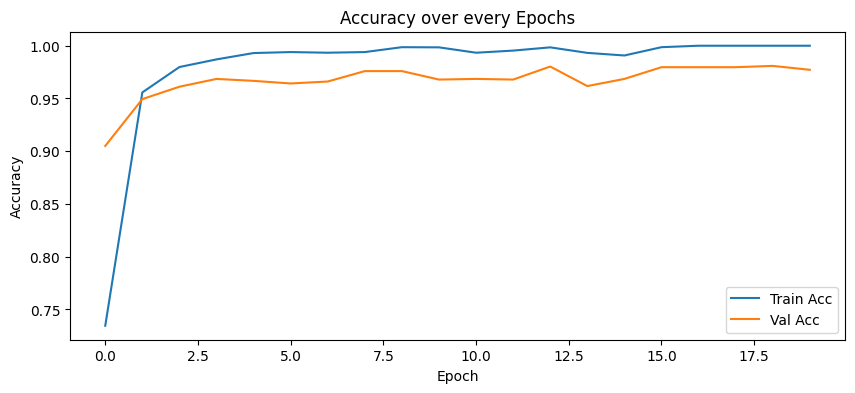

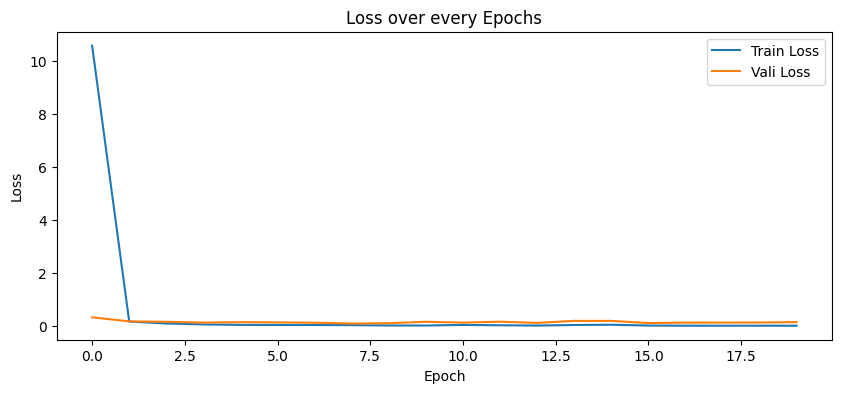

In [ ]:
# CNN Model Architecture
def Trfic_CNN():

  Trfic_ML = Trfic_P4.Sequential([
      Trfic_P3.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
      Trfic_P3.MaxPooling2D(2, 2),

      Trfic_P3.Conv2D(64, (3, 3), activation='relu'),
      Trfic_P3.MaxPooling2D(2, 2),

      Trfic_P3.Conv2D(128, (3, 3), activation='relu'),
      Trfic_P3.MaxPooling2D(2, 2),

      Trfic_P3.Flatten(),
      Trfic_P3.Dense(128, activation='relu'),
      Trfic_P3.Dense(5, activation='softmax')
  ])

  # Model Compilation
  Trfic_ML.compile(optimizer='adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  Trfic_M_h = Trfic_ML.fit( Trfic_Tr_aug, epochs=20, validation_data=Trfic_Vl_aug)

  # Evaluate on the validation data
  val_Trfic_loss, val_Trfic_acc = Trfic_ML.evaluate(Trfic_Vl_aug)
  print(f" Validation data Loss: {val_Trfic_loss:.2f}")
  print(f" Validation data Accuracy: {val_Trfic_acc:.2f}")

    # Plot training and validation accuracy & LOSS
  Trfic_P8.figure(figsize=(10, 4))
  Trfic_P8.plot(Trfic_M_h.history['accuracy'], label='Train Acc')
  Trfic_P8.plot(Trfic_M_h.history['val_accuracy'], label='Val Acc')
  Trfic_P8.title('Accuracy over every Epochs')
  Trfic_P8.xlabel('Epoch')
  Trfic_P8.ylabel('Accuracy')
  Trfic_P8.legend()
  Trfic_P8.show()

  Trfic_P8.figure(figsize=(10, 4))
  Trfic_P8.plot(Trfic_M_h.history['loss'], label='Train Loss')
  Trfic_P8.plot(Trfic_M_h.history['val_loss'], label='Vali Loss')
  Trfic_P8.title('Loss over every Epochs')
  Trfic_P8.xlabel('Epoch')
  Trfic_P8.ylabel('Loss')
  Trfic_P8.legend()
  Trfic_P8.show()

Trfic_CNN()